In [128]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
df = pd.read_csv("Data/insurance - insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# - Q1. Do smokers have higher insurance charges than non-smokers?

1. Stating the Hypothesis & Null Hypothesis:

 - (Null Hypothesis): There is no difference in insurance charges between smokers and non-smokers. 

 - (Alternative Hypothesis): There is a significant difference in insurance charges between smokers and non-smokers.
 
 - Alpha: We will be using an alpha=.05

- Selecting the correct test according to the data type and number of samples

In [13]:
#making col of targets
col = df[['smoker', 'charges']]
col.head(3)

,smoker,charges
0,yes,16884.9240
1,no,1725.5523
2,no,4449.4620


In [25]:
#splitting smokers and charges and counting 
smoker_y = col[col['smoker'] == 'yes']
num_y = smoker_y.count()
print(num_y)
smoker_y.head(3)

smoker     274
charges    274
dtype: int64


,smoker,charges
0,yes,16884.9240
11,yes,27808.7251
14,yes,39611.7577


In [26]:
##splitting smokers and charges and counting 
smoker_n = col[col['smoker'] == 'no']
num_n = smoker_n.count()
print(num_n)
smoker_n.head(3)

smoker     1064
charges    1064
dtype: int64


,smoker,charges
1,no,1725.55230
2,no,4449.46200
3,no,21984.47061


In [15]:
#Making a df just for visualization by concat the groups
plot_df = pd.concat([smoker_y, smoker_n])
plot_df

,smoker,charges
0,yes,16884.9240
11,yes,27808.7251
14,yes,39611.7577
19,yes,36837.4670
23,yes,37701.8768
...,...,...
1332,no,11411.6850
1333,no,10600.5483
1334,no,2205.9808
1335,no,1629.8335


<AxesSubplot:xlabel='smoker', ylabel='charges'>

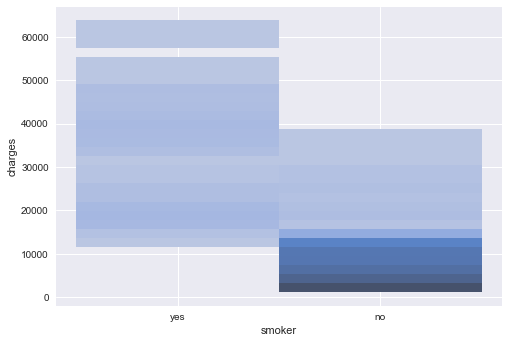

In [67]:
# visualize the group of smokers
sns.histplot(data=plot_df, x='smoker', y='charges')

- Testing the assumptions of  selected test.
    - Independent t-test (2-sample) for numeric 

In [28]:
#saving just the numeric charges as a col for group variables
yes_charges = smoker_y['charges']
no_charges = smoker_n['charges']
print(smoker_y)
print(smoker_n)

     smoker      charges
0       yes  16884.92400
11      yes  27808.72510
14      yes  39611.75770
19      yes  36837.46700
23      yes  37701.87680
...     ...          ...
1313    yes  36397.57600
1314    yes  18765.87545
1321    yes  28101.33305
1323    yes  43896.37630
1337    yes  29141.36030

[274 rows x 2 columns]
     smoker      charges
1        no   1725.55230
2        no   4449.46200
3        no  21984.47061
4        no   3866.85520
5        no   3756.62160
...     ...          ...
1332     no  11411.68500
1333     no  10600.54830
1334     no   2205.98080
1335     no   1629.83350
1336     no   2007.94500

[1064 rows x 2 columns]


In [32]:
#checking yes smokers charges for outliers
zscores_y = stats.zscore(yes_charges)
outliers_y = abs(zscores_y)>3
np.sum(outliers_y)

0

- No outliers for yes smoker charges

In [39]:
#checking no smokers charges for outliers
no_outliers = np.abs(stats.zscore(no_charges))>3
no_outliers.value_counts()

False    1040
True       24
Name: charges, dtype: int64

In [41]:
no_charges = no_charges[~no_outliers]

- 24 outliers for non smokers charges and i removed them.

In [45]:
# Checking yes smoker group for normality
result_yes = stats.normaltest(yes_charges)
print(result_yes)
result_yes.pvalue< .05

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)


True

In [46]:
# Checking no smoker group for normality
result_no = stats.normaltest(no_charges)
print(result_no)
result_no.pvalue< .05

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)


True

- Charges for yes and no smokers is allot  less than the pvalue. Thus, our data is NOT normally distributed. However, this is fine due to our sample size being large enough to proceed without satisfying this test.  For an independent t test, sample sizes of 15 or more per group are considered sufficient.

In [48]:
#Testing for Equal Variance with Levene's test
equal_result = stats.levene(yes_charges, no_charges)
print(equal_result)
equal_result.pvalue < .05

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)


True

- The Equal Variance with Levene's test shows our pvalue is less than 0.05. Thus, we have equal variances between the two groups.

In [50]:
#Final Independent t-test fter confirming we meet most of the assumptions
final_result = stats.ttest_ind(yes_charges, no_charges)
print(final_result)
print(f"p-value = {final_result.pvalue:.10f}")
print(f"Significant: {final_result.pvalue <.05}")

Ttest_indResult(statistic=51.2078044173717, pvalue=3.68768124e-315)
p-value = 0.0000000000
Significant: True


Final Conclusion:
- Our test says p value < 0.05. Thus, we reject the null hypothesis and support the alternative hypothesis. There is a significant difference in insurance charges between smokers and non-smokers.

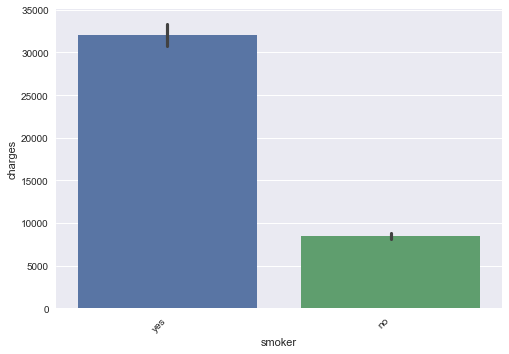

In [65]:
# Final barplot
ax = sns.barplot(data=col, x='smoker', y='charges')
ax.set_xticklabels( ax.get_xticklabels(), rotation=45, ha='right');

# - Q2. Are men more likely to smoke than women?

Stating the Hypothesis & Null Hypothesis:

- (Null Hypothesis): There is no difference in who smokes more between men and women.

- (Alternative Hypothesis): There is a significant difference in who smokes more between men and women.

- Alpha: We will be using an alpha=.05

Selecting the correct test according to the data type and number of samples

In [80]:
col_two = df[['sex','smoker']]
col_two.value_counts()
print(col_two)

         sex smoker
0     female    yes
1       male     no
2       male     no
3       male     no
4       male     no
...      ...    ...
1333    male     no
1334  female     no
1335  female     no
1336  female     no
1337  female    yes

[1338 rows x 2 columns]


In [83]:
#grouping to see value counts
col_two.groupby('sex')['smoker'].value_counts()

sex     smoker
female  no        547
        yes       115
male    no        517
        yes       159
Name: smoker, dtype: int64

In [85]:
female_smokers = col_two[col_two['sex'] == 'female']
male_smokers = col_two[col_two['sex'] == 'male']
print(female_smokers)
print(male_smokers)
print(female_smokers.value_counts())
print(male_smokers.value_counts())

         sex smoker
0     female    yes
5     female     no
6     female     no
7     female     no
9     female     no
...      ...    ...
1332  female     no
1334  female     no
1335  female     no
1336  female     no
1337  female    yes

[662 rows x 2 columns]
       sex smoker
1     male     no
2     male     no
3     male     no
4     male     no
8     male     no
...    ...    ...
1324  male     no
1325  male     no
1327  male     no
1329  male     no
1333  male     no

[676 rows x 2 columns]
sex     smoker
female  no        547
        yes       115
dtype: int64
sex   smoker
male  no        517
      yes       159
dtype: int64


In [74]:
#Making a df just for visualization by concat the groups
plot_df_two = pd.concat([female_smokers, male_smokers])
plot_df_two

,sex,smoker
0,female,yes
5,female,no
6,female,no
7,female,no
9,female,no
...,...,...
1324,male,no
1325,male,no
1327,male,no
1329,male,no


In [88]:
#getting the contingency table by calculating the contingency table with pd.cross-tab
table = pd.crosstab(col_two['sex'], col_two['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [91]:
#running the test and saving the output
m_f_result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = m_f_result 

In [92]:
#checking p-value
print(p)
p<.05

0.006548143503580696


True

- Our Chi-Squared p-value is less than 0.05, so this is a significant result.

Final Conclusion:

- Our test says p value < 0.05. Thus, we reject the null hypothesis that there is no difference in who smokes more between men and women. This also means we support the alternative hypothesis and conclude that there is a relationship between who smokes more between men and women.

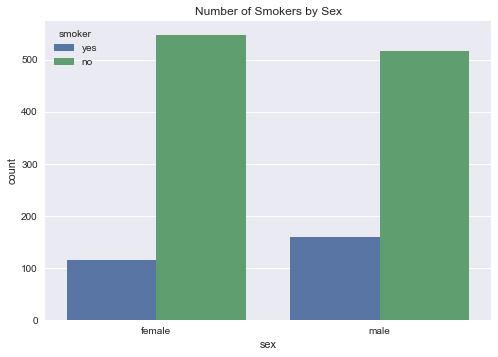

In [87]:
## visualize the group of smokers
ax = sns.countplot(data=plot_df_two, x='sex',hue='smoker',)
ax.set_title("Number of Smokers by Sex");

# - Q3. Do different regions have different charges, on average?

Stating the Hypothesis & Null Hypothesis:

- (Null Hypothesis): All regions and charges on average are the same.

- (Alternative Hypothesis): There is a significant difference on average between regions and charges.

- Alpha: We will be using an alpha=.05

Selecting the correct test according to the data type and number of samples

In [95]:
col_three = df[['region', 'charges']]
col_three.head(3)

,region,charges
0,southwest,16884.9240
1,southeast,1725.5523
2,southeast,4449.4620


In [96]:
col_three.value_counts()

region     charges    
northwest  1639.56310     2
northeast  1694.79640     1
southeast  14001.13380    1
           16085.12750    1
           15161.53440    1
                         ..
northwest  6686.43130     1
           6664.68595     1
           6571.02435     1
           6548.19505     1
southwest  52590.82939    1
Length: 1337, dtype: int64

In [97]:
col_three.groupby('region')['charges'].mean()

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

In [109]:
#making region groups
NE = col_three[col_three['region'] == 'northeast']
NW = col_three[col_three['region'] == 'northwest']
SE = col_three[col_three['region'] == 'southeast']
SW = col_three[col_three['region'] == 'southwest']

In [110]:
#making region groups with charges as numeric
NE_charges = NE['charges']
NW_charges = NW['charges']
SE_charges = SE['charges']
SW_charges = SW['charges']

In [112]:
#checking region groups for outliers NE
zscores_NE = stats.zscore(NE_charges)
outliers_NE = abs(zscores_NE)>3
np.sum(outliers_NE)

4

In [113]:
#removing NE outliers
NE_charges = NE_charges[~outliers_NE]

In [114]:
#checking region groups for outliers NW
zscores_NW = stats.zscore(NW_charges)
outliers_NW = abs(zscores_NW)>3
np.sum(outliers_NW)

7

In [115]:
#removing NW outliers
NW_charges = NW_charges[~outliers_NW]

In [116]:
#checking region groups for outliers SE
zscores_SE = stats.zscore(SE_charges)
outliers_SE = abs(zscores_SE)>3
np.sum(outliers_SE)

2

In [117]:
#removing SE outliers
SE_charges = SE_charges[~outliers_SE]

In [118]:
#checking region groups for outliers SW
zscores_SW = stats.zscore(SW_charges)
outliers_SW = abs(zscores_SW)>3
np.sum(outliers_SW)

8

In [119]:
#removing SE outliers
SW_charges = SW_charges[~outliers_SW]

In [120]:
#creating groups in dictionary for regions
groups = {}

for i in col_three['region'].unique():
    data = df.loc[col_three['region'] == i, 'charges'].copy()
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [121]:
#running assumption normality on each group and making sure there are enough n
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    norm_results[i] = {'n': len(data), 'p':p, 'test stat':stat,}
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [122]:
#valadiating the above data by checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


- We confirm that each group is not a normal distribution.

In [125]:
# the assumption of equal variance.
lev = stats.levene(*groups.values())
print(lev)
lev.pvalue < .05

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)


True

- This low p-value suggests that the charges do not have equal
variances.

In [127]:
## perform the One-Way ANOVA Test on hypothesis 
final_result_two= stats.f_oneway( *groups.values())
print(final_result_two)
final_result_two.pvalue<.05

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)


True

- This p-value represents the differences between all groups and it is suggesting to reject the null hypothesis.

In [129]:
#labeling values and labels
values = col_three['charges']
labels = col_three['region']

In [130]:
## performing tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


Final Conclusion:

Our overall p-value test shows that we can reject the null hypothesis. However, in more detail our tukeys test showed that there is a significant difference in the results of charges in 1 group compared to another.  That would be region southeast over southwest. Thus, there is a significant difference on average between regions and charges specifically between southeast and southwest. 

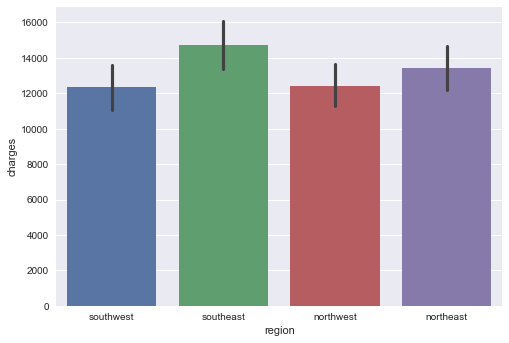

In [98]:
sns.barplot(data=col_three, x='region',y='charges');